### Assignment
### 21BDA59
### ML LAB 07


In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
sns.set_palette('husl')
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn import metrics
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

C:\Users\hp\anaconda3\lib\site-packages\scipy\__init__.py:138: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.0)
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion} is required for this version of "


##### QUESTION 2 What is Stride, Padding & Pooling? Explain with an example?

### 1) Stride

### 
Stride is a component of convolutional neural networks, or neural networks tuned for the compression of images and video data. Stride is a parameter of the neural network's filter that modifies the amount of movement over the image or video. For example, if a neural network's stride is set to 1, the filter will move one pixel, or unit,  at a time. The size of the filter affects the encoded output volume, so stride is often set to a whole integer, rather than a fraction or decimal.

7 x 7 input volume, a 3 x 3 filter (Disregard the 3rd dimension for simplicity), and a stride of 1.
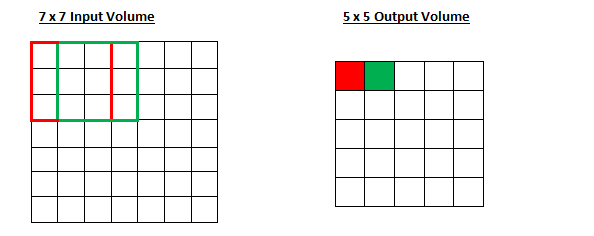

#### 2) paddding

Padding is a term relevant to convolutional neural networks as it refers to the amount of pixels added to an image when it is being processed by the kernel of a CNN. For example, if the padding in a CNN is set to zero, then every pixel value that is added will be of value zero. If, however, the zero padding is set to one, there will be a one pixel border added to the image with a pixel value of zero

Working : kernel is the neural networks filter which moves across the image, scanning each pixel and converting the data into a smaller, or sometimes larger, format. In order to assist the kernel with processing the image, padding is added to the frame of the image to allow for more space for the kernel to cover the image. Adding padding to an image processed by a CNN allows for more accurate analysis of images. 

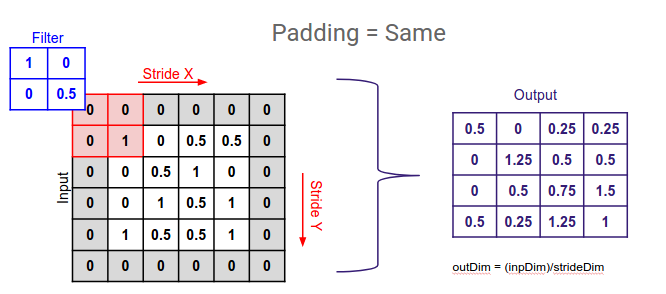

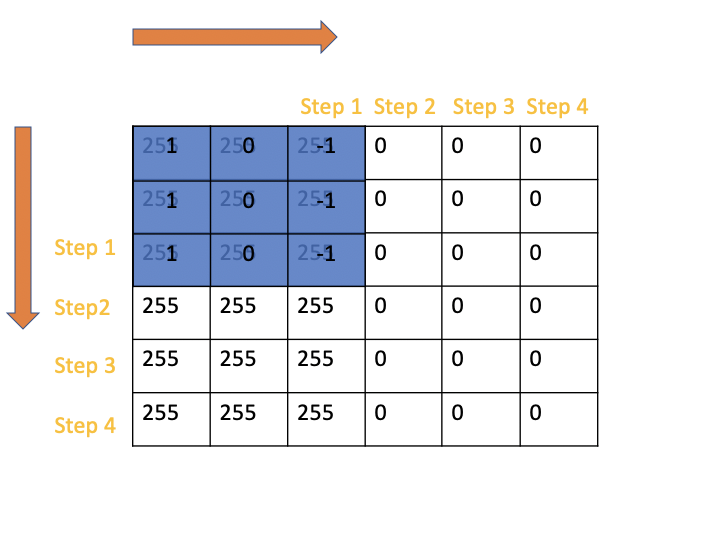

In [2]:
#### 3) Pooling

Pooling in convolutional neural networks is a technique for generalizing features extracted by convolutional filters and helping the network recognize features independent of their location in the image. 
working : we select a filter and slide it over the output feature map of the preceding convolutional layer. The most commonly used filter size is 2×2 and it is slid over the input using a stride of 2. Based on the type of pooling operation you’ve selected, the pooling filter calculates an output on the receptive field (the part of the feature map under the filter).
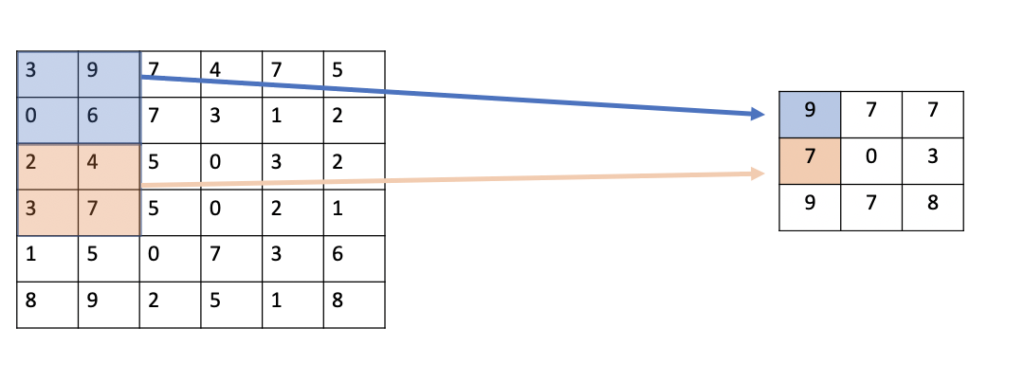
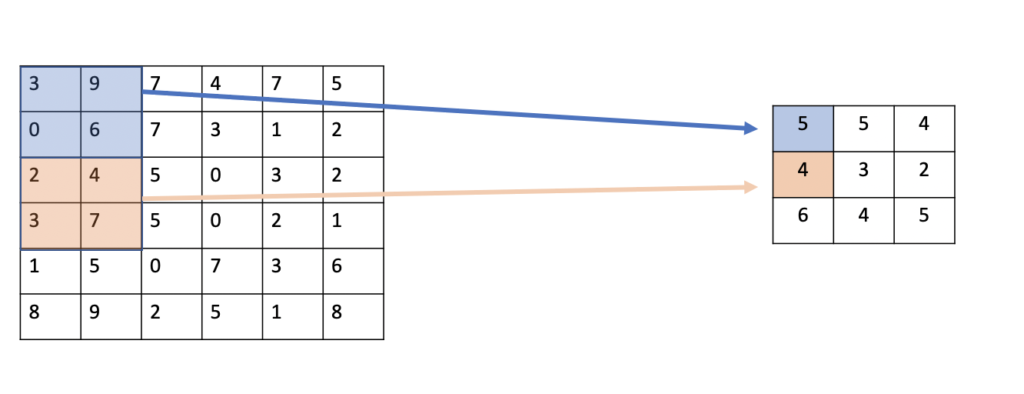

#### Question 1) Have you come across Grid Search Cross Validation? Fit any two models covered in previous classes and optimize them using Grid search CV.

Grid Search cross-validation is a technique to select the best of the machine learning model, parameterized by a grid of hyperparameters. Scikit-Learn library comes with grid search cross-validation implementation.

Grid Search CV tries all combinations of parameters grid for a model and returns with the best set of parameters having the best performance score. This can also serve as a disadvantage, as training the model of each combination of parameters increases the time complexity.

In [3]:

from sklearn import datasets
iris = datasets.load_iris()

### Decision Tree

In [4]:
from sklearn import tree        
from sklearn.pipeline import make_pipeline
from sklearn import preprocessing
from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import cross_val_score

tree_score_table = pd.DataFrame(columns=['Criterion', 'Accuracy'])   
tree_crit = ['gini', 'entropy']         
tree_score_table['Criterion'] = tree_crit      

cv = ShuffleSplit(n_splits=5, test_size=0.3, random_state=0) #determining where to separe test and train data

j = 0

for i in tree_crit: #loop over criterion
    tree_model = make_pipeline(preprocessing.StandardScaler(), tree.DecisionTreeClassifier(criterion=i)) #initialize decision tree
    tree_score_table.iloc[j, 1] = cross_val_score(tree_model, iris.data, iris.target, cv = cv).mean() #cross validation for decision tree
    j += 1 #update j
    
print(tree_score_table)


  Criterion  Accuracy
0      gini  0.937778
1   entropy  0.942222


There are a lot of parameters to optimize in the decision tree. Let's tune the hyper-parameters of it by an exhaustive grid search using the GridSearchCV.

In [5]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split

### Decision Tree

In [6]:
from sklearn.model_selection import GridSearchCV

criteria = ["gini", "entropy"]      #criteria to be tested
min_sample_split_range = [2,10, 20] #min sample split to be tested
max_depth_range = [None, 2, 5, 10]  #max depth to be tested
min_samples_leaf_range = [1, 5, 10] #min samples in the leaf to be tested
min_leaf_nodes_range = [None, 5, 10, 20]    #min leaf nodes to be tested

param_grid = {"criterion": criteria,
              "min_samples_split": min_sample_split_range,
              "max_depth": max_depth_range,
              "min_samples_leaf": min_samples_leaf_range,
              "max_leaf_nodes": min_leaf_nodes_range
                }

grid = GridSearchCV(estimator=tree.DecisionTreeClassifier(), 
                    param_grid=param_grid, 
                    cv = 5, 
                    scoring='accuracy', 
                    refit=True)     #setting grid with estimator

tree_model = make_pipeline(preprocessing.StandardScaler(), grid)    #creating preprocessing
tree_model.fit(iris.data, iris.target)      #fitting data

print("Accuracy of the tuned model: %.4f" %grid.best_score_)
print(grid.best_params_)

Accuracy of the tuned model: 0.9733
{'criterion': 'gini', 'max_depth': None, 'max_leaf_nodes': 5, 'min_samples_leaf': 1, 'min_samples_split': 10}


### KNeighbour

In [7]:
from sklearn.neighbors import KNeighborsClassifier

weight_functions = ["uniform", "distance"]
p_values = [1, 2]
n_range = list(range(1, 51))

param_grid = {"n_neighbors": n_range,
              "weights": weight_functions,
              "p": p_values
              }         #setting grid of parameters

grid = GridSearchCV(estimator = KNeighborsClassifier(), 
                    param_grid = param_grid, 
                    cv = 5, 
                    scoring = 'accuracy', 
                    refit = True)   #setting grid with estimator

knn_model = make_pipeline(preprocessing.StandardScaler(), grid)     #creating preprocessing
knn_model.fit(iris.data, iris.target)       #fitting data

print("Accuracy of the tuned model: %.4f" %grid.best_score_)
print(grid.best_params_)

Accuracy of the tuned model: 0.9667
{'n_neighbors': 6, 'p': 2, 'weights': 'uniform'}


#### QUESTION 3 - Fit a CNN model on the dataset which has been assigned to you. Print a classification report to see the model metrics on train and test datasets

##### importing libraries

In [8]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

import cv2
import os
os.environ["TF_CPP_MIN_LOG_LEVEL"] = "2"
import warnings
warnings.filterwarnings('ignore')

from sklearn.metrics import confusion_matrix, classification_report

import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Activation, BatchNormalization, Conv2D, Dense, Dropout, Flatten, MaxPooling2D
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.losses import CategoricalCrossentropy
from tensorflow.keras.regularizers import l2
from tensorflow.keras.callbacks import ReduceLROnPlateau, EarlyStopping

##### Splitting training and test dataset


In [9]:
validation_dataset_path='C:\\Users\\hp\\Downloads\\seg_test'

In [10]:
train_dataset_path='C:\\Users\\hp\\Downloads\\seg_train'

#### Applying augumentation

In [11]:
IMG_WIDTH = 150
IMG_HEIGHT = 150
BATCH_SIZE = 32

###### Loading the training dataset and applying augmentations on it.

In [12]:
train_datagen = ImageDataGenerator(rescale=1.0/255,
                                  zoom_range=0.2,
                                  width_shift_range=0.2,
                                  height_shift_range=0.2,
                                  fill_mode='nearest')
train_generator = train_datagen.flow_from_directory(train_dataset_path,
                                                   target_size=(IMG_WIDTH, IMG_HEIGHT),
                                                   batch_size=BATCH_SIZE,
                                                   class_mode='categorical',
                                                   shuffle=True)

Found 14034 images belonging to 6 classes.


#### Loading the validation dataset.

In [13]:
validation_datagen = ImageDataGenerator(rescale=1.0/255)
validation_generator = validation_datagen.flow_from_directory(validation_dataset_path,
                                                             target_size=(IMG_WIDTH, IMG_HEIGHT),
                                                             batch_size=BATCH_SIZE,
                                                             class_mode='categorical',
                                                             shuffle=True)

Found 3000 images belonging to 6 classes.


In [14]:
labels = {value: key for key, value in train_generator.class_indices.items()}

print("Label Mappings for classes present in the training and validation datasets\n")
for key, value in labels.items():
    print(f"{key} : {value}")

Label Mappings for classes present in the training and validation datasets

0 : buildings
1 : forest
2 : glacier
3 : mountain
4 : sea
5 : street


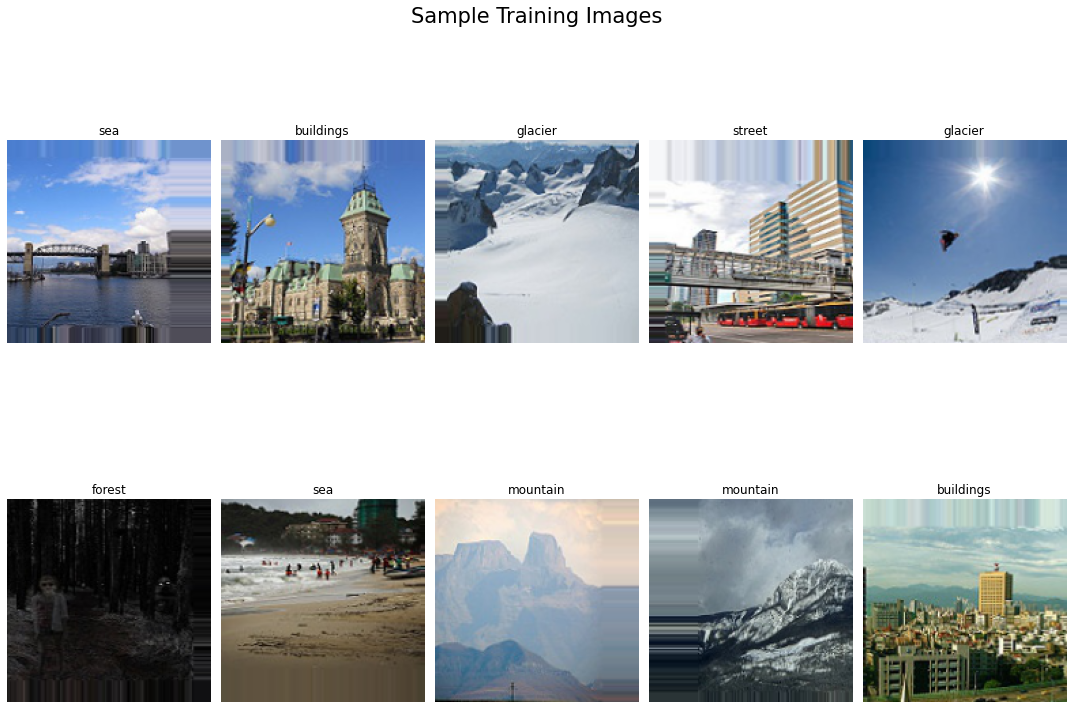

In [15]:
fig, ax = plt.subplots(nrows=2, ncols=5, figsize=(15, 12))
idx = 0

for i in range(2):
    for j in range(5):
        label = labels[np.argmax(train_generator[0][1][idx])]
        ax[i, j].set_title(f"{label}")
        ax[i, j].imshow(train_generator[0][0][idx][:, :, :])
        ax[i, j].axis("off")
        idx += 1

plt.tight_layout()
plt.suptitle("Sample Training Images", fontsize=21)
plt.show()

#### CNN Modelling

In [16]:
def create_model():
    model = Sequential([
        Conv2D(filters=128, kernel_size=(5, 5), padding='valid', input_shape=(IMG_WIDTH, IMG_HEIGHT, 3)),
        Activation('relu'),
        MaxPooling2D(pool_size=(2, 2)),
        BatchNormalization(),
        
        Conv2D(filters=64, kernel_size=(3, 3), padding='valid', kernel_regularizer=l2(0.00005)),
        Activation('relu'),
        MaxPooling2D(pool_size=(2, 2)),
        BatchNormalization(),
        
        Conv2D(filters=32, kernel_size=(3, 3), padding='valid', kernel_regularizer=l2(0.00005)),
        Activation('relu'),
        MaxPooling2D(pool_size=(2, 2)),
        BatchNormalization(),
        
        Flatten(),
        
        Dense(units=256, activation='relu'),
        Dropout(0.5),
        Dense(units=6, activation='softmax')
    ])
    return model

In [17]:
cnn_model = create_model()

In [18]:
print(cnn_model.summary())

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 146, 146, 128)     9728      
                                                                 
 activation (Activation)     (None, 146, 146, 128)     0         
                                                                 
 max_pooling2d (MaxPooling2D  (None, 73, 73, 128)      0         
 )                                                               
                                                                 
 batch_normalization (BatchN  (None, 73, 73, 128)      512       
 ormalization)                                                   
                                                                 
 conv2d_1 (Conv2D)           (None, 71, 71, 64)        73792     
                                                                 
 activation_1 (Activation)   (None, 71, 71, 64)        0

In [19]:
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=np.sqrt(0.1), patience=5)

#### Defining optimizer

In [20]:
optimizer = Adam(learning_rate=0.001)

#### Compiling

In [21]:
cnn_model.compile(optimizer=optimizer, loss=CategoricalCrossentropy(), metrics=['accuracy'])

#### Training

In [ ]:
history = cnn_model.fit(train_generator, epochs=50, validation_data=validation_generator,
                       verbose=2,
                       callbacks=[reduce_lr])

Epoch 1/50


In [ ]:
train_accuracy = history.history['accuracy']
val_accuracy = history.history['val_accuracy']

train_loss = history.history['loss']
val_loss = history.history['val_loss']

learning_rate = history.history['lr']

###### Plotting training and Validation accuracy

In [ ]:
fig, ax = plt.subplots(nrows=3, ncols=1, figsize=(12, 10))

ax[0].set_title('Training Accuracy vs. Epochs')
ax[0].plot(train_accuracy, 'o-', label='Train Accuracy')
ax[0].plot(val_accuracy, 'o-', label='Validation Accuracy')
ax[0].set_xlabel('Epochs')
ax[0].set_ylabel('Accuracy')
ax[0].legend(loc='best')

ax[1].set_title('Training/Validation Loss vs. Epochs')
ax[1].plot(train_loss, 'o-', label='Train Loss')
ax[1].plot(val_loss, 'o-', label='Validation Loss')
ax[1].set_xlabel('Epochs')
ax[1].set_ylabel('Loss')
ax[1].legend(loc='best')

ax[2].set_title('Learning Rate vs. Epochs')
ax[2].plot(learning_rate, 'o-', label='Learning Rate')
ax[2].set_xlabel('Epochs')
ax[2].set_ylabel('Loss')
ax[2].legend(loc='best')

plt.tight_layout()
plt.show()

#### Testing dataset

In [ ]:
test_dataset = 'C:\\Users\\hp\\Downloads\\seg_test'

In [ ]:
test_datagen = ImageDataGenerator(rescale=1.0/255)

test_generator = test_datagen.flow_from_directory(test_dataset,
                                                 shuffle=False,
                                                 batch_size=BATCH_SIZE,
                                                 target_size = (IMG_WIDTH, IMG_HEIGHT),
                                                 class_mode='categorical')

##### Prediction

In [ ]:
predictions = cnn_model.predict(test_generator)

In [ ]:
fig, ax = plt.subplots(nrows=2, ncols=5, figsize=(12, 10))
idx = 0

for i in range(2):
    for j in range(5):
        predicted_label = labels[np.argmax(predictions[idx])]
        ax[i, j].set_title(f"{predicted_label}")
        ax[i, j].imshow(test_generator[0][0][idx])
        ax[i, j].axis("off")
        idx += 1

plt.tight_layout()
plt.suptitle("Test Dataset Predictions", fontsize=20)
plt.show()

In [ ]:
test_loss, test_accuracy = cnn_model.evaluate(test_generator, batch_size=BATCH_SIZE)

In [ ]:
print(f"Test Loss:     {test_loss}")
print(f"Test Accuracy: {test_accuracy}")

##### metrices

In [ ]:
y_pred = np.argmax(predictions, axis=1)
y_true = test_generator.classes

In [ ]:
cf_mtx = confusion_matrix(y_true, y_pred)

group_counts = ["{0:0.0f}".format(value) for value in cf_mtx.flatten()]
group_percentages = ["{0:.2%}".format(value) for value in cf_mtx.flatten()/np.sum(cf_mtx)]
box_labels = [f"{v1}\n({v2})" for v1, v2 in zip(group_counts, group_percentages)]
box_labels = np.asarray(box_labels).reshape(6, 6)

plt.figure(figsize = (12, 10))
sns.heatmap(cf_mtx, xticklabels=labels.values(), yticklabels=labels.values(),
           cmap="YlGnBu", fmt="", annot=box_labels)
plt.xlabel('Predicted Classes')
plt.ylabel('True Classes')
plt.show()

In [ ]:
print(classification_report(y_true, y_pred, target_names=labels.values()))

#### QUESTION 4 - What is overfitting? How to overcome overfitting in an ML model?

Overfitting happens when a model learns the detail and noise in the training data to the extent that it negatively impacts the performance of the model on new data. This means that the noise or random fluctuations in the training data is picked up and learned as concepts by the model.

Methods to overcome Overfitting- 

1)Cross-validation
Cross-validation is a powerful preventative measure against overfitting. It allows you to tune hyperparameters with only your original training set. This allows you to keep your test set as a truly unseen dataset for selecting your final model.

2) Regularization
Regularization refers to a broad range of techniques for artificially forcing our model to be simpler.
The method will depend on the type of learner we are using. For example, you could prune a decision tree, use dropout on a neural network, or add a penalty parameter to the cost function in regression.

3) Ensembling
Ensembles are machine learning methods for combining predictions from multiple separate models. There are a few different methods for ensembling, but the two most common are:
a)Bagging attempts to reduce the chance overfitting complex models.
b)Boosting attempts to improve the predictive flexibility of simple models.



4)Feature selection (data)

If we have only a limited amount of training samples, each with a large number of features, we should only select the most important features for training so that our model doesn’t need to learn for so many features and eventually overfit. We can simply test out different features, train individual models for these features, and evaluate generalization capabilities, or use one of the various widely used feature selection methods

5)Data augmentation (data)
A larger dataset would reduce overfitting. If we cannot gather more data and are constrained to the data we have in our current dataset, we can apply data augmentation to artificially increase the size of our dataset. For example, if we are training for an image classification task, we can perform various image transformations to our image dataset (e.g., flipping, rotating, rescaling, shifting)